In [1]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [2]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-02-22 06:24:17--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   309MB/s    in 1.3s    

2023-02-22 06:24:18 (309 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’ saved [430460776/430460776]

(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gnu

In [3]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
%matplotlib inline

--2023-02-22 06:25:13--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip.3’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.003s  

2023-02-22 06:25:14 (20.3 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip.3’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
# Extract Images
annotations_path = "labels_my-project-name_2023-02-22-05-11-12.json"

In [5]:
from m_rcnn import *

VERS 0.4 - updated 04/08/2022
... done downloading pretrained model!


In [7]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/data/training_images", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/data/training_images", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/labels_my-project-name_2023-02-22-05-11-12.json
Annotation json path:  /content/labels_my-project-name_2023-02-22-05-11-12.json
Train: 313
Validation: 39
Classes: 1


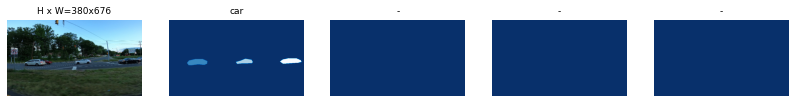

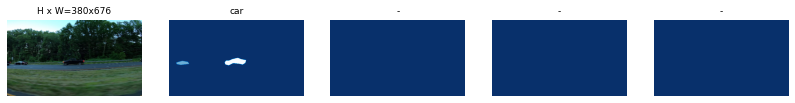

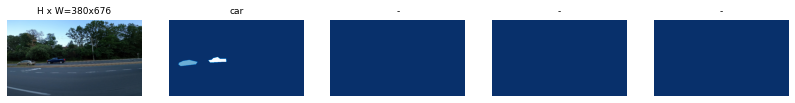

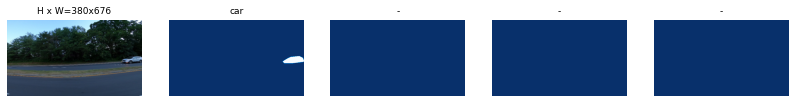

In [13]:
# Load image samples
display_image_samples(dataset_train)

In [8]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [9]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230222T0628/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

In [10]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/logs/object20230222T0628/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


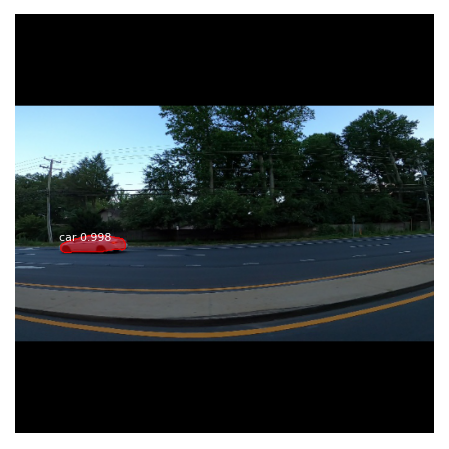

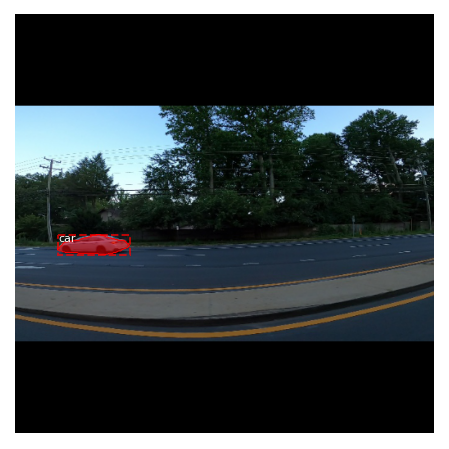

In [12]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)